In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [56]:
dataDF = pd.read_csv('./DATA/mbti_sam.csv')

In [58]:
dataDF['type'].str.contains

In [59]:
dataDF

,Unnamed: 0,posts,type
0,0,edit galaxy guy alone like live enjoy replace...,INTJ
1,1,bucket water demon leak church pour terrify p...,INTJ
2,2,bathroom vacuum truck relief essential item s...,INTJ
3,3,buy valid energize clean fill debt pool bag t...,INTJ
4,4,hopefully father unfortunately exact vacation...,INTJ
...,...,...,...
79995,79995,find think world limit friend hug like nuance...,INFP
79996,79996,buy single cherish gift introspection people ...,INFP
79997,79997,hot movie think assume really like infp recen...,INFP
79998,79998,really angry get like girl ect people platfor...,INFP


In [11]:
piedata = dataDF.groupby('type').count()
piedata.index

Index(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ',
       'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype='object', name='type')

In [23]:
piedata_x = np.array(piedata.values).reshape(-1)

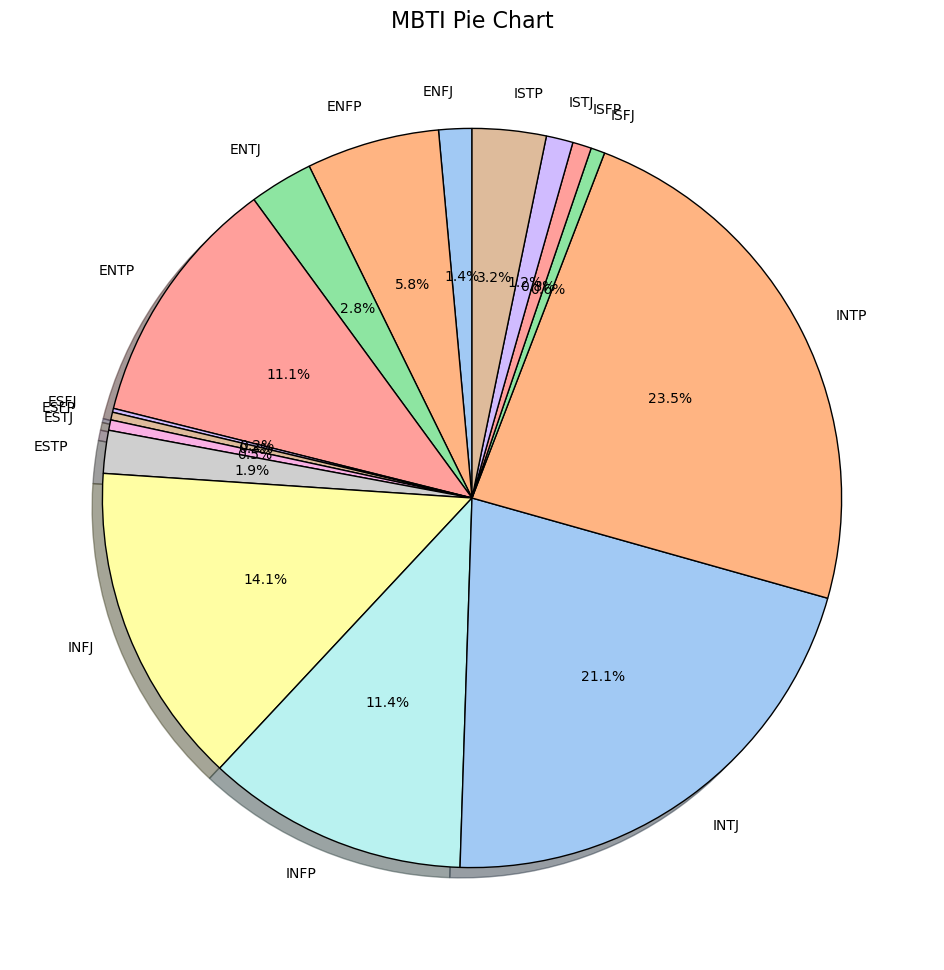

In [49]:
# seaborn의 팔레트 활용
colors = sns.color_palette('pastel',n_colors=len(piedata_x))

# 파이차트 그리기
plt.figure(figsize=(12,12))
plt.pie(piedata_x, labels=piedata.index, colors=colors, autopct='%1.1f%%', 
        startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title("MBTI Pie Chart", fontsize=16)
plt.show()

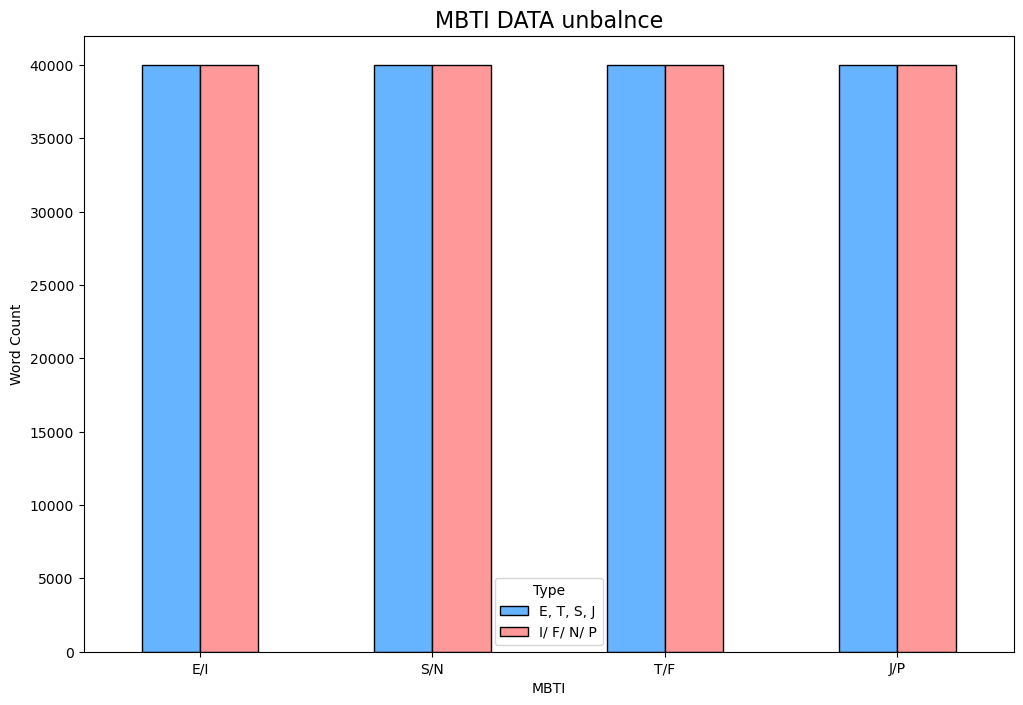

In [54]:
# 각 이분법 카운트 계산
counts = {
    'E/I': [dataDF['type'].str.count('E').sum(), dataDF['type'].str.count('I').sum()],
    'S/N': [dataDF['type'].str.count('S').sum(), dataDF['type'].str.count('N').sum()],
    'T/F': [dataDF['type'].str.count('T').sum(), dataDF['type'].str.count('F').sum()],
    'J/P': [dataDF['type'].str.count('J').sum(), dataDF['type'].str.count('P').sum()]
}

# 데이터프레임으로 변환
counts_df = pd.DataFrame(counts, index=['Count_E', 'Count_I']).T

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
counts_df.plot(kind='bar', color=['#66b3ff', '#ff9999'], edgecolor='black', ax=plt.gca())
plt.title("MBTI DATA unbalnce", fontsize=16)
plt.xlabel("MBTI")
plt.ylabel("Word Count")
plt.xticks(rotation=0)
plt.legend(title='Type', labels=['E, T, S, J', 'I/ F/ N/ P'])
plt.show()